In [8]:
import pandas as pd
import gensim
from sklearn.manifold import MDS
from sklearn.manifold import TSNE 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [9]:
def top_n_similar_words(model_, word, n_top):
    data = model_.wv.most_similar(positive=[word], negative=[], topn=n_top)
    df = pd.DataFrame(data, columns=['word', 'similarity'])
    df['target_word'] = word
    return df[['target_word', 'word', 'similarity']]


In [10]:
# Reduccion de la dimensionalidad y visualizacion 
def visualize_embeddings(distancias,palabras,colores,perplexity):
    plt.figure(figsize=(20,10))
    # Reduccion de la dimensionalidad y visualizacion 
    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                       dissimilarity="precomputed", n_jobs=1)
    Y = mds.fit(distancias).embedding_
    plt.subplot(1,2,1)
    plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    for label, x, y, color in zip(palabras, Y[:, 0], Y[:, 1],colores):
        plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=13)
    plt.title("MDS")
    # Reduccion de la dimensionalidad y visualizacion 
    tsne = TSNE(n_components=2,metric="precomputed",learning_rate=1000, random_state=123,perplexity=perplexity)
    np.set_printoptions(suppress=True)
    plt.subplot(1,2,2)
    Y = tsne.fit_transform(distancias)
    plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    for label, x, y, color in zip(palabras, Y[:, 0], Y[:, 1],colores):
        plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=13)
    plt.title("TSNE")

In [11]:
def visualizacion_grupos_palabras(model_, lista_de_grupos):
    colors = ['blue','green','red','cyan','magenta','yellow','black','white']
    colors_list = []
    for i in range(len(lista_de_grupos)):
        colors_list.append([colors[i]]*len(lista_de_grupos[i]))
    colors_list = [item for sublist in colors_list for item in sublist]

    
    palabras = [item for sublist in lista_de_grupos for item in sublist]

    # Armo una matriz de distancias
    distancias=np.zeros((len(palabras),len(palabras))) #matriz cuadrada
    for i,ti in enumerate(palabras):
        for j,tj in enumerate(palabras):
            distancias[i,j] = abs(1-model_.wv.similarity(ti,tj))

    visualize_embeddings(distancias,palabras,colors_list,perplexity=4)

In [17]:
def distancia_entre_palabras(model_, palabra_a, palabra_b):
    print (f"{palabra_a}-{palabra_b} similarity:",model_.wv.n_similarity([palabra_a], [palabra_b]))

In [13]:
model_path = "models/model_spanish_Áreas naturales.model"

In [14]:
# Load pre-trained Word2Vec model.
model = gensim.models.Word2Vec.load(model_path)

In [15]:
top_n_similar_words(model, 'perito_moreno', 5)

,target_word,word,similarity
0,perito_moreno,glaciar,0.933931
1,perito_moreno,perito,0.924343
2,perito_moreno,glacial,0.876382
3,perito_moreno,lacustrar,0.870636
4,perito_moreno,excursión_lacustr,0.856324


In [18]:
distancia_entre_palabras(model,"glaciar", "lindo")

glaciar-lindo similarity: 0.40154365


In [19]:
grupos = [["lindo","feo","maravilloso","increible","horrible"]
,["caro","barato","precio","costoso"]
,["perito_moreno","glaciar","pasarela","barco"]]



/home/vscode/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


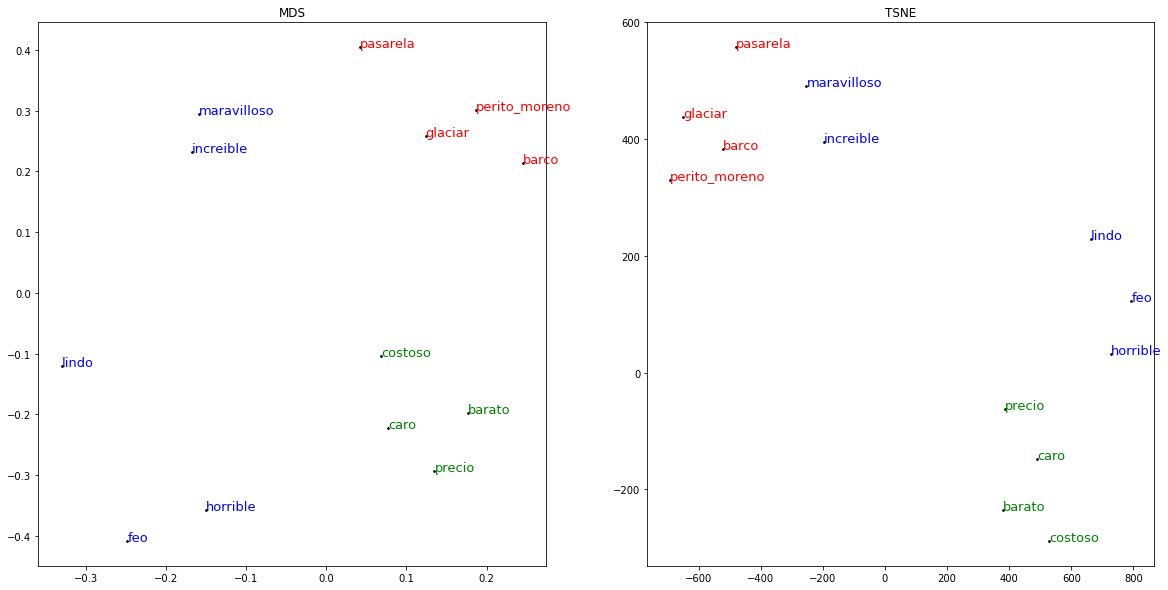

In [20]:
visualizacion_grupos_palabras(model, grupos)